<a href="https://www.kaggle.com/code/francescoliveras/sexism-comments-eda-and-model-en-es?scriptVersionId=208612023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">Sexist detector model and EDA</p>

<div style="text-align: center;">
    <img src="https://i0.wp.com/socialsuccessmarketing.com/storage/2021/02/how-to-join-an-ongoing-social-media-chat-2.jpeg?resize=560%2C315" alt="Descripción de la imagen" width="500">
</div

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>
​
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>
​
**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
​
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The dataset contains categorical information associated with texts and tags related to content analysis. The data are distributed in different files representing different stages of the machine learning process: training, validation and testing. Each row represents a single entry with the following fields:

* rewire_id: Unique identifier for each entry in the dataset.
* text: Associated text, which may include sentences, paragraphs or other forms of textual content.
* label_sexist: Categorical label indicating whether the text contains sexist content.
* label_category: Subcategory that provides additional information about the type of labeled content.
* label_vector: Vector representation or advanced categorization of the labels.
  
This dataset is useful for text classification projects, bias detection, and development of machine learning models focused on language evaluation.

Purpose:
The main purpose is to analyze and classify texts based on their content. This dataset could be used to train supervised models that address inclusive language and bias detection problems.

| Name            | Data Type       | Has Nulls   | Categorical/Continuous | Description          | Units |
|------------------|-----------------|-------------|-------------------------|----------------------|-------|
| rewire_id        | object          | False       | Categorical            | rewire_id data       | N/A   |
| text             | object          | False       | Categorical            | text data            | N/A   |
| label_sexist     | object          | False       | Categorical            | label_sexist data    | N/A   |
| label_category   | object          | False       | Categorical            | label_category data  | N/A   |
| label_vector     | object          | False       | Categorical            | label_vector data    | N/A   |

**🟥ES**:

El conjunto de datos contiene información categórica asociada a textos y etiquetas relacionadas con el análisis de contenido. Los datos están distribuidos en diferentes archivos que representan distintas etapas del proceso de aprendizaje automático: entrenamiento, validación y prueba. Cada fila representa una entrada única con los siguientes campos:

* rewire_id: Identificador único para cada entrada en el conjunto de datos.
* text: Texto asociado, que puede incluir oraciones, párrafos u otras formas de contenido textual.
* label_sexist: Etiqueta categórica que indica si el texto tiene contenido sexista.
* label_category: Subcategoría que proporciona información adicional sobre el tipo de contenido etiquetado.
* label_vector: Representación vectorial o categorización avanzada de las etiquetas.
  
Este conjunto de datos es útil para proyectos de clasificación de texto, detección de sesgos y desarrollo de modelos de aprendizaje automático enfocados en la evaluación del lenguaje.

Propósito:
El propósito principal es analizar y clasificar textos en función de su contenido. Este conjunto de datos podría ser utilizado para entrenar modelos supervisados que aborden problemas de lenguaje inclusivo y detección de sesgos.

| Name            | Data Type       | Has Nulls   | Categorical/Continuous | Description          | Units |
|------------------|-----------------|-------------|-------------------------|----------------------|-------|
| rewire_id        | object          | False       | Categorical            | rewire_id data       | N/A   |
| text             | object          | False       | Categorical            | text data            | N/A   |
| label_sexist     | object          | False       | Categorical            | label_sexist data    | N/A   |
| label_category   | object          | False       | Categorical            | label_category data  | N/A   |
| label_vector     | object          | False       | Categorical            | label_vector data    | N/A   |

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import re
import gc
import sys
import math
import time
import random
import warnings
import datetime
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

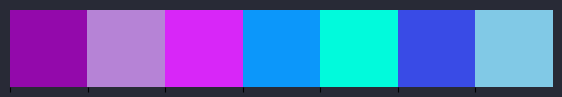

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/sexism-detection-in-english-texts"
DEV_FILE = "dev.csv"
TEST_FILENAME = "test (1).csv"
TRAIN_FILENAME = "train (2).csv"

DEV_DIR = os.path.join(PATH, DEV_FILE)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME) 
TEST_DIR = os.path.join(PATH, TEST_FILENAME)

In [5]:
TARGET = "label_sexist"

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def show_pie_categorical(dataframe, target=TARGET):
    target_counts = dataframe[target].value_counts()

    # Creando el gráfico de pastel con un agujero en el centro
    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=[PALETTE_7_C[0],PALETTE_7_C[1]])

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Ajustando el aspecto para que sea un círculo y mostrando el gráfico
    plt.title('Distribución de los Targets')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and Data modification</p>

In [8]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
dev_df = pd.read_csv(DEV_DIR)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocesar los datos: convertir etiquetas en formato binario
label_encoder = LabelEncoder()

# Etiquetar la columna 'label_sexist' como binaria (0 = not sexist, 1 = sexist)
train_df['label_sexist_binary'] = label_encoder.fit_transform(train_df[TARGET])
test_df['label_sexist_binary'] = label_encoder.transform(test_df[TARGET])
dev_df['label_sexist_binary'] = label_encoder.transform(dev_df[TARGET])

# Separar características (text) y etiquetas (label)
X_train, y_train = train_df['text'], train_df['label_sexist_binary']
X_test, y_test = test_df['text'], test_df['label_sexist_binary']
X_dev, y_dev = dev_df['text'], dev_df['label_sexist_binary']

# Mostrar un resumen del conjunto de entrenamiento
train_summary = {
    "Total samples": len(X_train),
    "Sexist": y_train.sum(),
    "Not sexist": len(y_train) - y_train.sum()
}
train_summary

{'Total samples': 14000, 'Sexist': 3398, 'Not sexist': 10602}

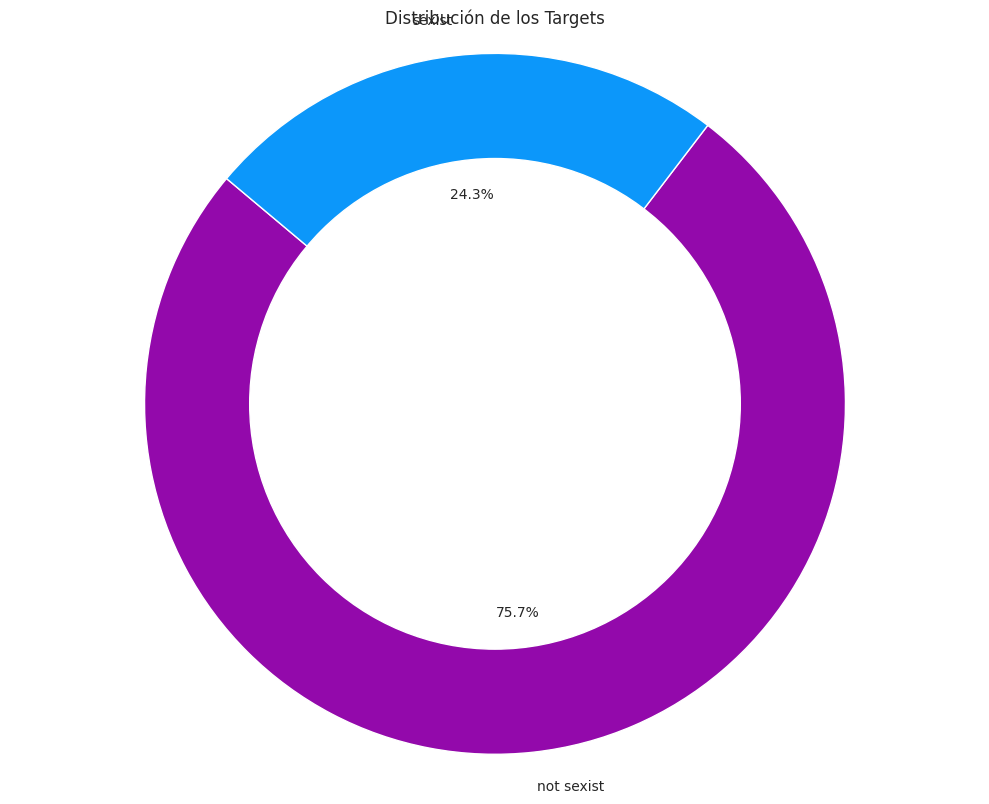

In [10]:
show_pie_categorical(train_df)

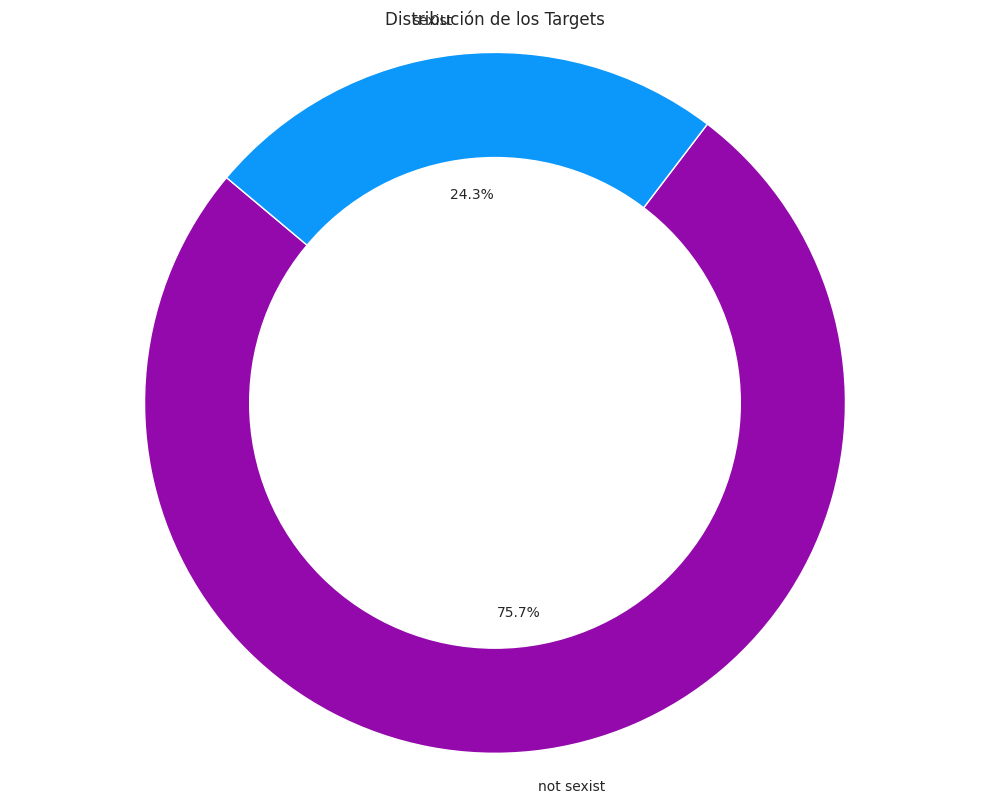

In [11]:
show_pie_categorical(test_df)

OLD

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [13]:
# Descargar recursos necesarios para lematización y stopwords
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('stopwords')

# Inicializar lematizador y stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

In [15]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Remover URLs, menciones, hashtags y caracteres especiales
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+|[^a-zA-Z\s]", "", text)
    # Tokenización y lematización
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [16]:
# Aplicar la limpieza a los conjuntos de datos
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)
X_dev_cleaned = X_dev.apply(preprocess_text)

In [17]:
# Añadir la longitud del texto como característica adicional
train_df['text_length'] = X_train_cleaned.apply(len)
test_df['text_length'] = X_test_cleaned.apply(len)
dev_df['text_length'] = X_dev_cleaned.apply(len)

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitamos a las 5000 palabras más relevantes
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_cleaned)
X_test_tfidf = tfidf_vectorizer.transform(X_test_cleaned)
X_dev_tfidf = tfidf_vectorizer.transform(X_dev_cleaned)

In [19]:
# Resumen de los datos preprocesados
processed_summary = {
    "Features (TF-IDF)": X_train_tfidf.shape[1],
    "Average text length (train)": train_df['text_length'].mean(),
    "Average text length (test)": test_df['text_length'].mean(),
    "Average text length (dev)": dev_df['text_length'].mean()
}

processed_summary

{'Features (TF-IDF)': 5000,
 'Average text length (train)': 78.49528571428571,
 'Average text length (test)': 76.99025,
 'Average text length (dev)': 77.49}

In [20]:
sexism_c = train_df[train_df['label_sexist'] == 'sexist']['text']
not_sexism_c = train_df[train_df['label_sexist'] == 'not sexist']['text']

In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

In [22]:
svm_model = LinearSVC(class_weight='balanced')  # Manejo de clases desbalanceadas
svm_model.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced')

In [23]:
y_dev_pred = svm_model.predict(X_dev_tfidf)
y_test_pred = svm_model.predict(X_test_tfidf)

In [24]:
dev_report = classification_report(y_dev, y_dev_pred, target_names=['Not Sexist', 'Sexist'])
test_report = classification_report(y_test, y_test_pred, target_names=['Not Sexist', 'Sexist'])
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [25]:
evaluation_summary = {
    "Dev Accuracy": dev_accuracy,
    "Test Accuracy": test_accuracy,
    "Dev Report": dev_report,
    "Test Report": test_report
}

evaluation_summary

{'Dev Accuracy': 0.772,
 'Test Accuracy': 0.77675,
 'Dev Report': '              precision    recall  f1-score   support\n\n  Not Sexist       0.87      0.82      0.85      1514\n      Sexist       0.53      0.61      0.56       486\n\n    accuracy                           0.77      2000\n   macro avg       0.70      0.72      0.71      2000\nweighted avg       0.78      0.77      0.78      2000\n',
 'Test Report': '              precision    recall  f1-score   support\n\n  Not Sexist       0.87      0.82      0.85      3030\n      Sexist       0.53      0.63      0.58       970\n\n    accuracy                           0.78      4000\n   macro avg       0.70      0.73      0.71      4000\nweighted avg       0.79      0.78      0.78      4000\n'}

In [26]:
np.random.seed(42)  # Para reproducibilidad
random_indices = np.random.choice(len(X_test), 10, replace=False)

# Extraer los textos, etiquetas reales y predicciones
sample_texts = X_test.iloc[random_indices]
sample_true_labels = y_test.iloc[random_indices]
sample_pred_labels = y_test_pred[random_indices]

In [27]:
# Crear un DataFrame para mostrar los resultados
sample_results = pd.DataFrame({
    "Text": sample_texts.values,
    "True Label": ["Sexist" if label == 1 else "Not Sexist" for label in sample_true_labels],
    "Predicted Label": ["Sexist" if label == 1 else "Not Sexist" for label in sample_pred_labels]
})
sample_results

,Text,True Label,Predicted Label
0,Did you just limit her child's gender??,Not Sexist,Not Sexist
1,"and she’s really hit on by many guys, and i st...",Not Sexist,Not Sexist
2,Drown her in pigs blood!!,Sexist,Not Sexist
3,I have received more compliments from gays tha...,Not Sexist,Not Sexist
4,"Ah, I see. The issue is you're courting camels...",Not Sexist,Not Sexist
5,But don't you miss having a first lady that co...,Sexist,Not Sexist
6,"She's hurt, omfg poor thing. Where are our tro...",Not Sexist,Not Sexist
7,So (((Hagee followers))) and other (((fake Chr...,Not Sexist,Not Sexist
8,"The more things change, the more they stay exa...",Not Sexist,Not Sexist
9,It is mind boggling how much these normies wor...,Not Sexist,Sexist


### <div style="text-align: center;">   Notebook in process, please leave your update if you find it useful.🙌🙏 </div>
### <div style="text-align: center;">   Notebook en proceso, deja tu update si te resutla de utilidad🙌🙏 </div>

<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/a0/f6/d8/a0f6d8722e2ca13e433591c68bc5401f.jpg" alt="Descripción de la imagen" width="500">
</div>